# Tesseract

In [1]:
!pip install pillow

In [2]:
!pip install pytesseract

In [3]:
!python.exe -m pip install --upgrade pip

/bin/bash: python.exe: command not found


In [4]:
!tesseract -v

tesseract 4.1.1
 leptonica-1.79.0
  libgif 5.1.4 : libjpeg 8d (libjpeg-turbo 2.0.3) : libpng 1.6.39 : libtiff 4.1.0 : zlib 1.2.13 : libwebp 0.6.1 : libopenjp2 2.5.0
 Found AVX2
 Found AVX
 Found FMA
 Found SSE
 Found libarchive 3.7.2 zlib/1.2.13 liblzma/5.2.6 bz2lib/1.0.8 liblz4/1.9.3 libzstd/1.5.5


In [3]:
!pip install opencv-python

In [4]:
from PIL import Image
import pytesseract
import argparse
import cv2
import os
import matplotlib.pyplot as plt

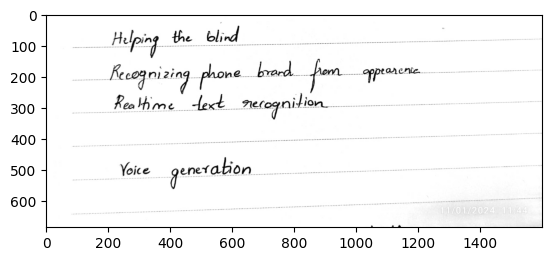

In [5]:
import cv2 
import pytesseract

img = cv2.imread(r"/kaggle/input/image-forocr/WhatsApp Image 2024-01-20 at 3.44.45 PM.jpeg")

if img is None:
    print("Image not loaded properly. Check the path.")
else:
    plt.imshow(img)

In [6]:
import cv2
import numpy as np

# img = cv2.imread(r"/kaggle/input/image-forocr/WhatsApp Image 2024-01-20 at 3.44.45 PM.jpeg")

# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)
 
#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)
    
#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED) 

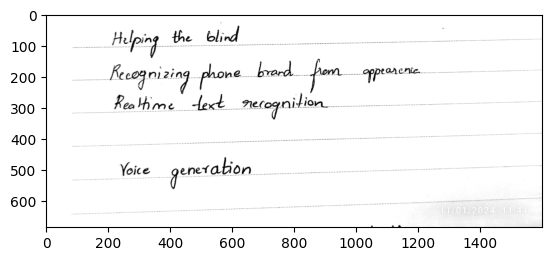

In [7]:
gray = get_grayscale(img)
plt.imshow(gray, cmap='gray')

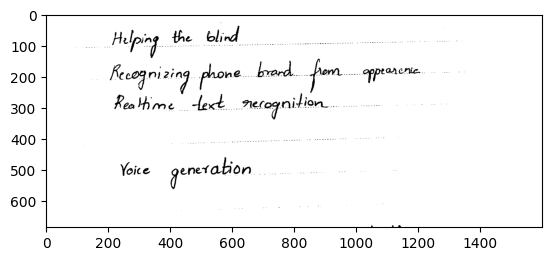

In [8]:
thresh = thresholding(gray)
plt.imshow(thresh, cmap='gray')

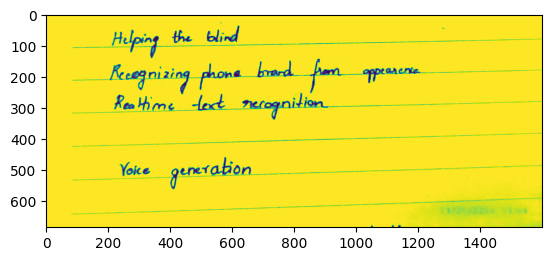

In [11]:
opening = opening(gray)
plt.imshow(opening)

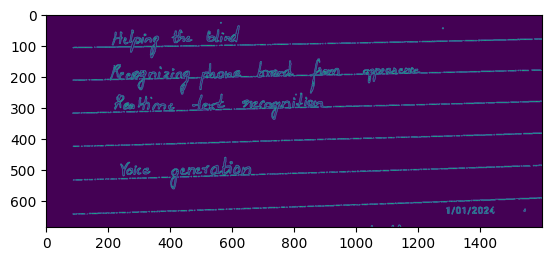

In [12]:
canny = canny(gray)
plt.imshow(canny)

### Direct Image sent

In [21]:
custom_config = r'--oem 3 --psm 6'
print(pytesseract.image_to_string(img, config=custom_config))

__fuping Be blind
Recognizing prone.brard..ferncppeanent _
Realhme dext recognition.

Yoice generation So



### Grayscale image sent

In [22]:
print(pytesseract.image_to_string(gray, config=custom_config))

__fuping Be blind
Recognizing prone.brard..ferncppeanent _
Realhme dext recognition.

Yoice generation So



### Threshold image sent

In [23]:
print(pytesseract.image_to_string(thresh, config=custom_config))

Helping, Bre blind
Recognizing prone. brard..fom. cppronene a
Realhrme ext... recognition... ce

Yoice generation OS



### Opening image sent

In [24]:
print(pytesseract.image_to_string(opening, config=custom_config))

Helping the blind
Reeag nizing prone frard. fw —eppeenemte. _
Realtime — dext recognition a .
Yoice gerexation a



### Canny image sent

In [25]:
print(pytesseract.image_to_string(canny, config=custom_config))

ee
——Lesagnizing pons _lomed.—foan—-spesacte
ee: ec
ne 7
eee 71



## Testing handwriting (hard)

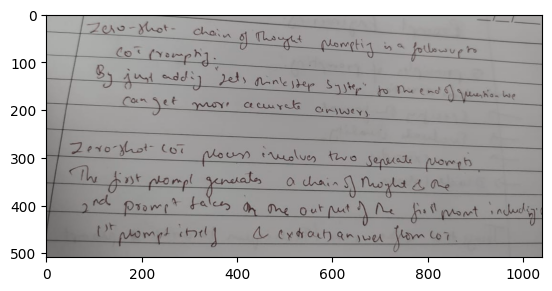

In [3]:
sak_img = cv2.imread(r"/kaggle/input/image-forocr/Sak_handwriting.jpeg")
plt.imshow(sak_img)

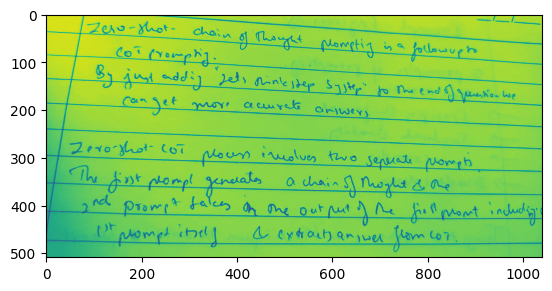

In [4]:
gray_s = get_grayscale(sak_img)
plt.imshow(gray_s)

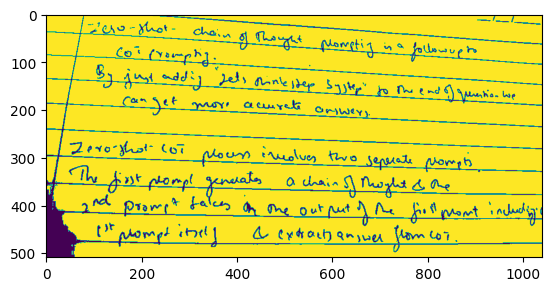

In [5]:
thresh_s = thresholding(gray_s)
plt.imshow(thresh_s)

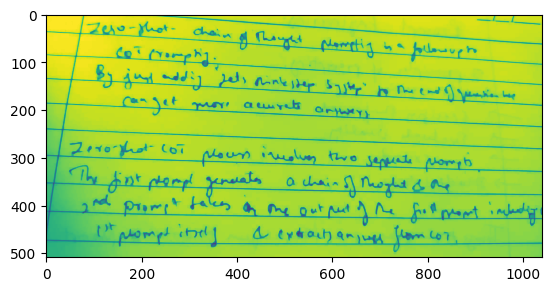

In [6]:
opening = opening(gray_s)
plt.imshow(opening)

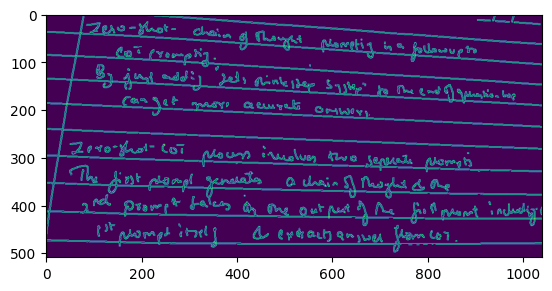

In [7]:
canny = canny(gray_s)
plt.imshow(canny)

In [9]:
custom_config = r'--oem 3 --psm 6'
print(pytesseract.image_to_string(sak_img, config=custom_config))

—/_h.
Zero Woot cha gi eee eee 7)
a U 4 Memchi4 uo vilow up
Cot (Yamphy. u ¢
8. i ane
; A J Jets Pane Jer SS ste pita ema ec tse
Con Vet UE ES olvneyy ‘
| Zero yrs Cor OU) tXaluer ve compet aes
Bethy aot Ormpl Ycprerahe O drain S\ Tus A Oe
} Y : U 6
a rh tow * Fealery Me out pt \ Ae {si ot saad:
0 o U
> er met Orel a Cyd art QhyoeA han 7 .
- 4 s



In [10]:
print(pytesseract.image_to_string(gray_s, config=custom_config))

—/—_/__.
Zene-Wret~ aie ging ga
8 Aud add’ Deby Mintesrer Saye ey oe om
Can yet ( atuuyek anyweyy, :
Zero yYrot Cot ou) Tush He pelbiater prorct
ail: pot Ompl ; ahs O Unnin §\ Mrs A a,
. U U
‘a rk raw Fen a My, out put \ Ne Bs W promt vr adudig
U U U
ok met corel Lo Cy ter anyon Ur 7.
: 3 4



In [13]:
print(pytesseract.image_to_string(opening, config=custom_config))

—_L__
— ie "Tee
. > Salts » Mine, b eer i.
~\ct ' auunk

evo- at Cor uy 7 Ke apes : <

! APY pte GO ela FY Pls A
U UY U 0 :
th aye © te gut Aut \ Pi, j fl . 0 “a
LP ptideryt ctoet A tydarh an A (on)
U



In [14]:
print(pytesseract.image_to_string(canny, config=custom_config))

eee
eas -oat- dein g Causa | ae ee a
Co* (vemehy. ;
@
8 roe aa pan eunate aaa Seek eet
aunts Se CT
— a a ee
a a eer ee
(eee Lee Lak Te ee
a Eas Tad a a ES ware eens
7a o mm ; F . ; eer
[ ead LT aa mae oA a Toe OR
ey iat Case — oo



# Board Handwriting 

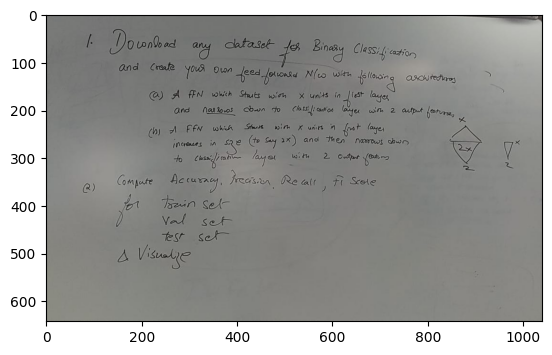

In [27]:
board_img = cv2.imread(r"/kaggle/input/image-forocr/Board.jpeg")
plt.imshow(board_img)

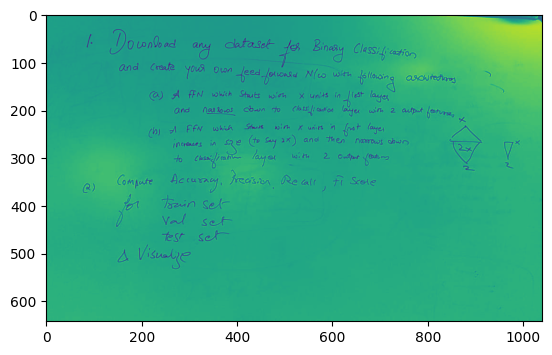

In [28]:
gray_b = get_grayscale(board_img)
plt.imshow(gray_b)

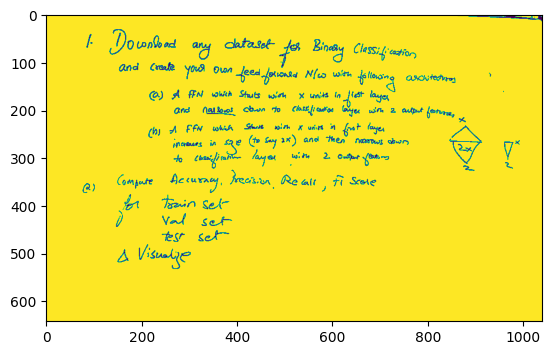

In [29]:
thresh_b = thresholding(gray_b)
plt.imshow(thresh_b)

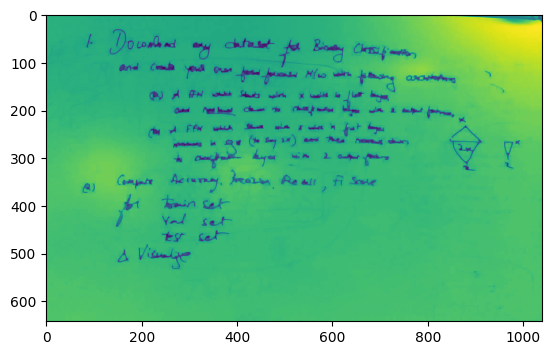

In [32]:
opening_b = opening(gray_b)
plt.imshow(opening_b)

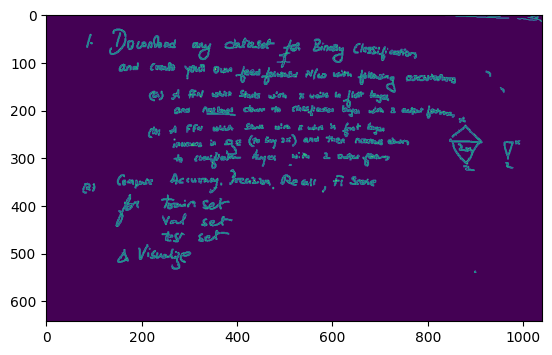

In [33]:
canny_b = canny(gray_b)
plt.imshow(canny_b)

In [34]:
print(pytesseract.image_to_string(board_img, config=custom_config))

ae
: Do wnoad any Ch tasee <* Bes CleSS 1 ecto
and Cree your Oun feed lotions Neo wien glooes ARON >
@) A FEN whith Stats wien X units Ia ae ages
Gnd Narioos Cbvn to  Clasii |i cadion bone, with 2 autput deture,
(by A FA whe See wim x ais oat lage S
pees ag @ oy ax) and then nomows bor x
i tasifjoo (aig 24 ihe 2 Cute fotins l
" 2
@) Ginpate oa, Preeisasy Re air , Ti Ste
tn Teen Sel
} Vt sef-
tes sek
A Viseelke



In [35]:
print(pytesseract.image_to_string(gray_b, config=custom_config))

ae
[: Do onload any Ch tasee <* Bess CleSS 1 ecto
d
and Creafe you Own ees ofprcnse Neo v0itn os ec .
@) A FEN whith Stats wien X units Ia oes ages,
Gnd Narioos Cbvn to Clalit cadion bone with 2 autput deturce,
(by) A FAM whe See wim x ais Goat lage .
[ocetaaes iA Si (fe Sy 2x) and Ahen Namres chor = x
4
i tasifjo (aig 24 W8ily 2 Ontae (Steno l
" 2
@) Ginpate eee, Preeisasy Re ale , Ti Ste
ol Tecan Sel
iL Vt sef-
Test Sek
A Viseelke



In [36]:
print(pytesseract.image_to_string(thresh_b, config=custom_config))

rene NR
f Do ton%o act ay Chtaseé- ;~* Binaay CHESS. aco
ad
and Creafe youa Own fees ofa Neo witn plang asctedire, ,
@) A FEN wohth Stats wich Xx units ta {* lejos,
Gnd Naldows Cbwn to Clas frcacton fryer with 2 autpt (ture,
(oy A EFM wi Sto lm a acct font lage ms
jocetaaes iA as (fe Sey ae) and Men names sbi x x
%
to tonifp (aug ot isfy 2. Onfae ftins v
. Bm
@) Compute Ae curnny, Precisarn Re alt , Ti Ste
& Bein Sete
U Val set
esr Sek
A Viseelye



In [37]:
print(pytesseract.image_to_string(opening_b, config=custom_config))

CO
L Dovauh
— ed OY
TR foe rams lao im pony cet Y
DY) A BPN ohh Sats eX tal he | baat
Ct at beet Cle Re any.
Ge Ri ek Bee ele eet fet e
‘alate ee Say 2) ee ete remem sr -
Lee be mL oe fee @ V
a) one Aerurny, reste, Reais, fi Ste
bt emir Get
/ Yoo! tet
ty tet
3 Vitwlge



In [38]:
print(pytesseract.image_to_string(canny_b, config=custom_config))

i
ene eliatel- a :
re | tke ra Binaty es
Pe ? . P
Bh sa Cr Soa Fed Nfeo wsite ae Ce -
Cee ee ee ec a lees" .
ae a ee
ne co
ny A Phere Store ten a ode foot bay
. Pe ee) “A Ea
ans fags site 2 Deter (Bins V
- ——
as Goapate iar oe Re ete , fi Scae
en a
Fi Ved sehr
te set
a ea

